In [26]:
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
base_url =  "https://vibe.rw/apartments-for-sale-in-kigali/"
response = requests.get(base_url)
response.status_code

200

In [28]:
soup = bs4(response.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<!-- This site is optimized with the Yoast SEO plugin v24.4 - https://yoast.com/wordpress/plugins/seo/ -->
<title>Apartments for Sale in Kigali - Vibe Real Estate</title>
<meta content="Explore a wide range of apartments for sale in upscale Kigali neighborhoods. Contact us for expert advice on real estate investments." name="description"/>
<link href="https://vibe.rw/apartments-for-sale-in-kigali/" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Apartments for Sa

In [40]:
properties = soup.find_all("div", class_="item-body flex-grow-1")
properties

[<div class="item-body flex-grow-1">
 <h2 class="item-title">
 <a href="https://vibe.rw/property/azalea-apartments-new-development-in-nyarutarama/" target="_blank">Azalea Apartments New Development in Nyarutarama</a>
 </h2><!-- item-title -->
 <div class="item-v5-price">
 					 $100,000				</div>
 <div class="item-v5-type">
 					Apartments, Commercial, Investment Opportunities				</div>
 <ul class="item-amenities item-amenities-with-icons">
 <li class="h-beds"><i class="houzez-icon icon-hotel-double-bed-1 mr-1"></i><span class="item-amenities-text">Bed:</span> <span class="hz-figure">1</span></li><li class="h-baths"><i class="houzez-icon icon-bathroom-shower-1 mr-1"></i><span class="item-amenities-text">Baths:</span> <span class="hz-figure">2,5</span></li></ul> </div>,
 <div class="item-body flex-grow-1">
 <h2 class="item-title">
 <a href="https://vibe.rw/property/aluna-residence-redefining-high-end-urban-living-in-kigali/" target="_blank">Aluna Residence: Redefining High-End Urban Li

In [43]:
from bs4 import BeautifulSoup
import pandas as pd


# List to hold property data
properties_data = []

# Loop through each property HTML block
for prop_html in properties:
    soup = BeautifulSoup(str(prop_html), 'html.parser')

    # Extract property title and link
    title_tag = soup.find('h2', class_='item-title')
    if title_tag and title_tag.a:
        title = title_tag.a.get_text(strip=True)
        link = title_tag.a['href']
    else:
        title = "Not Available"
        link = "Not Available"

    # Extract price
    price_tag = soup.find('div', class_='item-v5-price')
    if price_tag:
        price = price_tag.get_text(strip=True)
    else:
        price = "Not Available"

    # Extract property type (optional)
    type_tag = soup.find('div', class_='item-v5-type')
    property_type = type_tag.get_text(strip=True) if type_tag else "Not Available"

    # Initialize bedrooms, bathrooms, and area
    bedrooms = bathrooms = area = "Not Available"

    # Extract amenities (if available)
    details_tag = soup.find('ul', class_='item-amenities item-amenities-with-icons')
    if details_tag:
        # Bedrooms
        bed_tag = details_tag.find('li', class_='h-beds')
        if bed_tag:
            bed_span = bed_tag.find('span', class_='hz-figure')
            if bed_span:
                bedrooms = bed_span.get_text(strip=True)
        # Bathrooms
        bath_tag = details_tag.find('li', class_='h-baths')
        if bath_tag:
            bath_span = bath_tag.find('span', class_='hz-figure')
            if bath_span:
                bathrooms = bath_span.get_text(strip=True)
        # Area
        area_tag = details_tag.find('li', class_='h-area')
        if area_tag:
            area_span = area_tag.find('span', class_='hz-figure')
            if area_span:
                area = area_span.get_text(strip=True)

    # Append data to the list
    properties_data.append({
        'Title': title,
        'Link': link,
        'Price': price,
        'Type': property_type,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'Area (sqm)': area
    })

# Convert to a DataFrame
df = pd.DataFrame(properties_data)

# Print first few rows
df.head()


,Title,Link,Price,Type,Bedrooms,Bathrooms,Area (sqm)
0,Azalea Apartments New Development in Nyarutarama,https://vibe.rw/property/azalea-apartments-new...,"$100,000","Apartments, Commercial, Investment Opportunities",1,"2,5",Not Available
1,Aluna Residence: Redefining High-End Urban Liv...,https://vibe.rw/property/aluna-residence-redef...,"Start from$125,000","Apartments, Investment Opportunities",Not Available,Not Available,Not Available
2,Penthouse for Sale in Kacyiru – New Development,https://vibe.rw/property/penthou-for-sale-in-k...,on request,"Apartments, Investment Opportunities",5,5.5,180-422
3,3-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/3-br-apartment-for-sa...,"$290,000","Apartments, Investment Opportunities",3,3.5,180-422
4,2-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/2-br-apartment-for-sa...,"$265,000","Apartments, Investment Opportunities",2,2.5,180-422


In [44]:
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd

def scrape_properties(base_url, num_pages):
    all_properties_data = []

    for page_num in range(1, num_pages + 1):
        if page_num == 1:
            page_url = base_url
        else:
            page_url = f"{base_url}?page={page_num}"

        print(f"Scraping page: {page_url}")

        response = requests.get(page_url)
        response.raise_for_status()  # Raise an error if the request fails
        soup = bs4(response.text, 'lxml')

        # Extract property divs
        properties = soup.find_all("div", class_="item-body flex-grow-1")

        # Loop through each property div
        for prop in properties:
            # Extract title and link
            title_tag = prop.find('h2', class_='item-title')
            if title_tag and title_tag.a:
                title = title_tag.a.get_text(strip=True)
                link = title_tag.a['href']
            else:
                title = "Not Available"
                link = "Not Available"

            # Extract price
            price_tag = prop.find('div', class_='item-v5-price')
            price = price_tag.get_text(strip=True) if price_tag else "Not Available"

            # Extract property type
            type_tag = prop.find('div', class_='item-v5-type')
            property_type = type_tag.get_text(strip=True) if type_tag else "Not Available"

            # Initialize optional fields
            bedrooms = bathrooms = area = "Not Available"

            # Extract details if available
            details_tag = prop.find('ul', class_='item-amenities item-amenities-with-icons')
            if details_tag:
                bed_tag = details_tag.find('li', class_='h-beds')
                if bed_tag:
                    bed_span = bed_tag.find('span', class_='hz-figure')
                    if bed_span:
                        bedrooms = bed_span.get_text(strip=True)

                bath_tag = details_tag.find('li', class_='h-baths')
                if bath_tag:
                    bath_span = bath_tag.find('span', class_='hz-figure')
                    if bath_span:
                        bathrooms = bath_span.get_text(strip=True)

                area_tag = details_tag.find('li', class_='h-area')
                if area_tag:
                    area_span = area_tag.find('span', class_='hz-figure')
                    if area_span:
                        area = area_span.get_text(strip=True)

            # Append to list
            all_properties_data.append({
                'Title': title,
                'Link': link,
                'Price': price,
                'Type': property_type,
                'Bedrooms': bedrooms,
                'Bathrooms': bathrooms,
                'Area (sqm)': area
            })

    # Convert list to DataFrame
    df = pd.DataFrame(all_properties_data)
    return df

base_url = "https://vibe.rw/apartments-for-sale-in-kigali/"
num_pages = 3

df = scrape_properties(base_url, num_pages)
df.head()

Scraping page: https://vibe.rw/apartments-for-sale-in-kigali/
Scraping page: https://vibe.rw/apartments-for-sale-in-kigali/?page=2
Scraping page: https://vibe.rw/apartments-for-sale-in-kigali/?page=3


,Title,Link,Price,Type,Bedrooms,Bathrooms,Area (sqm)
0,Azalea Apartments New Development in Nyarutarama,https://vibe.rw/property/azalea-apartments-new...,"$100,000","Apartments, Commercial, Investment Opportunities",1,"2,5",Not Available
1,Aluna Residence: Redefining High-End Urban Liv...,https://vibe.rw/property/aluna-residence-redef...,"Start from$125,000","Apartments, Investment Opportunities",Not Available,Not Available,Not Available
2,Penthouse for Sale in Kacyiru – New Development,https://vibe.rw/property/penthou-for-sale-in-k...,on request,"Apartments, Investment Opportunities",5,5.5,180-422
3,3-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/3-br-apartment-for-sa...,"$290,000","Apartments, Investment Opportunities",3,3.5,180-422
4,2-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/2-br-apartment-for-sa...,"$265,000","Apartments, Investment Opportunities",2,2.5,180-422


In [46]:
df.to_csv('group13_viberwanda.csv')

In [47]:
df

,Title,Link,Price,Type,Bedrooms,Bathrooms,Area (sqm)
0,Azalea Apartments New Development in Nyarutarama,https://vibe.rw/property/azalea-apartments-new...,"$100,000","Apartments, Commercial, Investment Opportunities",1,"2,5",Not Available
1,Aluna Residence: Redefining High-End Urban Liv...,https://vibe.rw/property/aluna-residence-redef...,"Start from$125,000","Apartments, Investment Opportunities",Not Available,Not Available,Not Available
2,Penthouse for Sale in Kacyiru – New Development,https://vibe.rw/property/penthou-for-sale-in-k...,on request,"Apartments, Investment Opportunities",5,5.5,180-422
3,3-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/3-br-apartment-for-sa...,"$290,000","Apartments, Investment Opportunities",3,3.5,180-422
4,2-BR Apartment for Sale in Kacyiru – New Devel...,https://vibe.rw/property/2-br-apartment-for-sa...,"$265,000","Apartments, Investment Opportunities",2,2.5,180-422
5,"Modern Apartments for Sale in Nyarutarama, Kigali",https://vibe.rw/property/modern-apartments-for...,"Start from$195,000","Apartments, Investment Opportunities",Not Available,Not Available,Not Available
6,Modern Apartments in Kacyiru for Sale,https://vibe.rw/property/modern-apartments-in-...,"Start from$1,200","Apartments, Investment Opportunities",3,3,Not Available
7,Modern Apartments for Rent or Sale in Kibagabaga,https://vibe.rw/property/modern-apartments-for...,"Start from$1,100",Apartments,Not Available,Not Available,Not Available
8,New Development in Kacyiru: Modern Apartments ...,https://vibe.rw/property/new-development-moder...,"Start from$144,000","Apartments, Commercial, Investment Opportunities",Not Available,Not Available,Not Available
9,Azalea Apartments New Development in Nyarutarama,https://vibe.rw/property/azalea-apartments-new...,"$100,000","Apartments, Commercial, Investment Opportunities",1,"2,5",Not Available


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\educa\AppData\Local\Temp\ipykernel_56516\474848661.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Price_clean'] = df['Price'].replace('[\$,]', '', regex=True).replace('Not Available', None)


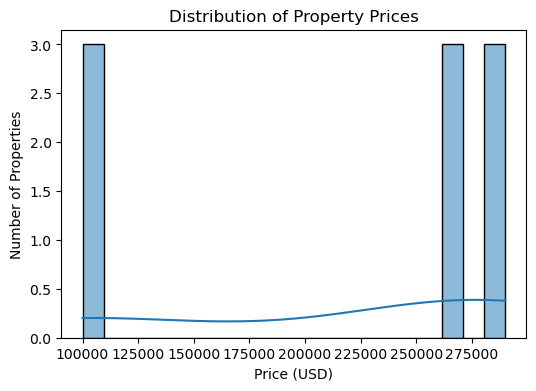

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert price to numeric (remove non-numeric characters like $ or commas)
df['Price_clean'] = df['Price'].replace('[\$,]', '', regex=True).replace('Not Available', None)
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

plt.figure(figsize=(6, 4))
sns.histplot(df['Price_clean'], bins=20, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Properties')
plt.savefig("price_distribution.png", dpi=300) 
plt.show()


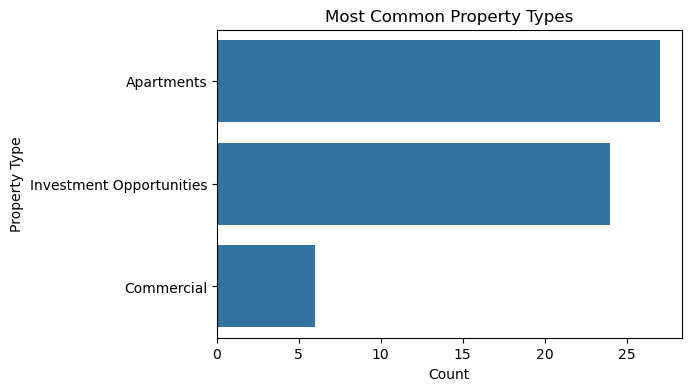

In [58]:
# Split property types by commas (since some listings have multiple types)
all_types = df['Type'].dropna().str.split(',').explode().str.strip()

plt.figure(figsize=(6, 4))
sns.countplot(y=all_types, order=all_types.value_counts().index)
plt.title('Most Common Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.savefig("price_distribution.png", dpi=300) 
plt.show()


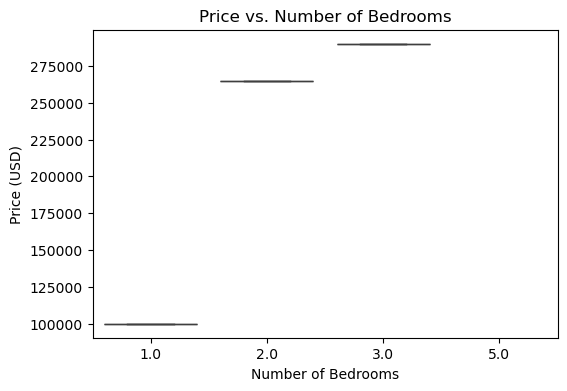

In [64]:
# Clean Bedrooms and Price
df['Bedrooms_clean'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms_clean'] = pd.to_numeric(df['Bathrooms'], errors='coerce')

plt.figure(figsize=(6, 4))
sns.boxplot(x='Bedrooms_clean', y='Price_clean', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (USD)')
plt.savefig("price_distribution.png", dpi=300) 
plt.show()


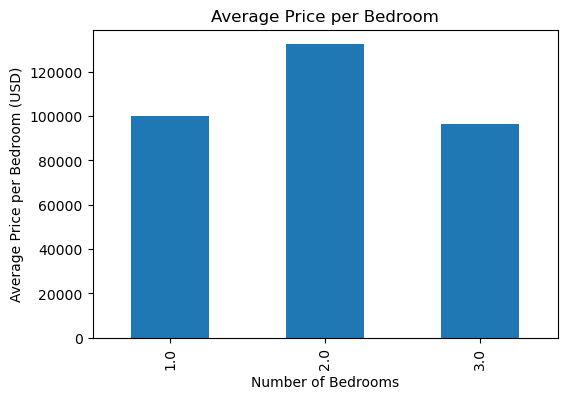

In [59]:
# Calculate price per bedroom
df['Price_per_bedroom'] = df['Price_clean'] / df['Bedrooms_clean']

avg_price_per_bedroom = df.groupby('Bedrooms_clean')['Price_per_bedroom'].mean().dropna()

plt.figure(figsize=(6, 4))
avg_price_per_bedroom.plot(kind='bar')
plt.title('Average Price per Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Bedroom (USD)')
plt.savefig("price_distribution.png", dpi=300) 
plt.show()


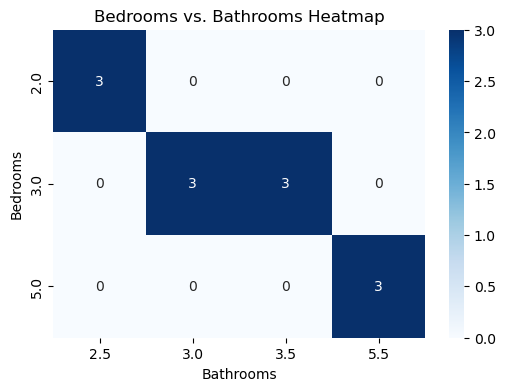

In [60]:
bed_bath_counts = df.groupby(['Bedrooms_clean', 'Bathrooms_clean']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(bed_bath_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Bedrooms vs. Bathrooms Heatmap')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.savefig("price_distribution.png", dpi=300) 
plt.show()
